In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random

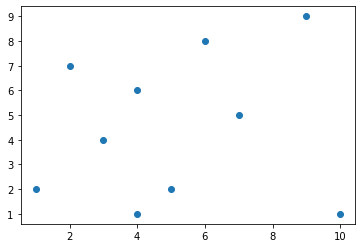

In [28]:
X=[1,2,3,4,4,5,6,7,9,10]
Y=[2,7,4,1,6,2,8,5,9,1]

plt.plot(X,Y,'o')
plt.show()

In [260]:
def EnfEst(coordX,coordY,obligados,N,t=5):
    T=t
    X0= random.sample(obligados,len(obligados))
    candidatos=list(range(0,len(coordX)))
    [candidatos.remove(x) for x in obligados if x in candidatos]
    Costo=0
    #Calculo del costo:
    Memoria=[X0]
    MemoriaCosto=[Costo]
    for ind in range(0,len(X0)-1):
        i=X0[ind]
        j=X0[ind+1]
        Costo=Costo+abs(coordX[j]-coordX[i])+abs(coordY[j]-coordY[i])
    
    
    #Haciendo una nueva trayectoria y vemos si la aceptamos
    Candidatos=[]
    for k in range(0,N):
        #hacemos una copia de las ciudades obligadas con la que trabajaremos adelante
        obligadoscopia=obligados.copy()
        #Elegimos el tamaño de la nueva trayectoria, donde
        #nos fijamos en que no pase del tamaño máximo ni del mínimo
        if len(X0)==len(obligados):
            suma=random.sample([0,1],1)[0]
        elif len(X0)==len(coordX):
            suma=random.sample([-1,0],1)[0]
        else:
            suma=random.sample([-1,0,1],1)[0]

            
        #seleccionamos la primer y última ciuidad que se van a visitar y las quitamos del arreglo copia
        InicioFinal=random.sample(obligadoscopia,2)
        [obligadoscopia.remove(x) for x in InicioFinal]
        sobrantes=(len(X0)-len(obligados))+suma
        #Escogemos la cantidad restante de nodos de la lista:
        extra=random.sample(candidatos,sobrantes)
        #Ya tenemos todos los nodos:
        obligadoscopia.extend(extra)
        trayectoria=[InicioFinal[0]]
        trayectoria.extend(random.sample(obligadoscopia,len(obligadoscopia)))
        trayectoria.append(InicioFinal[1])
        #Calculamos costos: 
        Costoc=0
        for ind in range(0,len(trayectoria)-1):
            i=trayectoria[ind]
            j=trayectoria[ind+1]
            Costoc=Costoc+abs(coordX[j]-coordX[i])+abs(coordY[j]-coordY[i])
        
        alfa=min(1, (np.exp(Costo/T)/np.exp(Costoc/T)) )
        if random.uniform(0,1)<alfa:
            X0=trayectoria.copy()
            Costo=Costoc
            Memoria.append(X0)
            MemoriaCosto.append(Costo)
        
        T=T-(t/N)
        Candidatos.append(trayectoria)
    return Memoria,MemoriaCosto,Candidatos 
        

In [346]:
resultados,costos,candidatos=EnfEst(X,Y,[0,4,5,6,9],500,t=25)

In [347]:
candidatos

[[6, 5, 0, 9, 4],
 [6, 5, 4, 0, 9],
 [4, 9, 6, 0, 7, 5],
 [0, 4, 9, 6, 5],
 [4, 9, 1, 0, 6, 5],
 [5, 6, 4, 8, 9, 0],
 [9, 6, 4, 0, 5],
 [6, 0, 5, 9, 4],
 [6, 4, 0, 9, 2, 5],
 [0, 4, 9, 6, 1, 5],
 [9, 6, 0, 4, 2, 5],
 [6, 0, 9, 4, 5],
 [9, 4, 0, 6, 5],
 [5, 2, 9, 6, 4, 0],
 [5, 4, 0, 2, 9, 6],
 [9, 3, 4, 6, 0, 5],
 [4, 0, 9, 6, 5],
 [9, 0, 5, 6, 4],
 [4, 0, 6, 5, 9],
 [4, 6, 9, 0, 5],
 [4, 5, 1, 9, 0, 6],
 [4, 9, 0, 5, 2, 6],
 [9, 0, 6, 5, 4],
 [6, 4, 9, 5, 0],
 [9, 2, 5, 0, 6, 4],
 [0, 6, 4, 5, 9],
 [9, 0, 6, 5, 4],
 [6, 4, 9, 0, 5],
 [6, 5, 4, 0, 2, 9],
 [4, 9, 6, 2, 5, 0],
 [6, 5, 0, 4, 9],
 [0, 9, 5, 4, 7, 6],
 [4, 3, 0, 6, 5, 9],
 [5, 4, 0, 6, 9],
 [4, 5, 9, 0, 6],
 [9, 6, 0, 4, 3, 5],
 [4, 8, 9, 0, 5, 6],
 [0, 2, 8, 6, 4, 5, 9],
 [0, 6, 4, 3, 9, 1, 5],
 [9, 6, 4, 8, 0, 2, 7, 5],
 [6, 5, 2, 8, 9, 4, 0],
 [9, 4, 3, 8, 6, 0, 5],
 [0, 5, 9, 6, 1, 4],
 [9, 1, 4, 6, 5, 7, 0],
 [9, 5, 4, 8, 3, 6, 0],
 [9, 4, 5, 7, 2, 8, 0, 6],
 [6, 3, 7, 0, 5, 4, 8, 9],
 [9, 4, 7, 6, 2, 0, 1, 5],
 [4, 0,

In [348]:
costos

[0,
 32,
 29,
 47,
 36,
 38,
 26,
 32,
 35,
 42,
 36,
 37,
 36,
 36,
 37,
 30,
 35,
 25,
 29,
 33,
 25,
 33,
 26,
 33,
 29,
 33,
 29,
 29,
 33,
 34,
 32,
 38,
 34,
 48,
 52,
 49,
 48,
 29,
 42,
 63,
 51,
 44,
 55,
 45,
 36,
 31,
 43,
 35,
 32,
 37,
 27,
 32,
 51,
 33,
 35,
 41,
 29,
 34,
 37,
 52,
 31,
 40,
 33,
 32,
 28,
 30,
 34,
 31,
 37,
 32,
 34,
 33,
 26,
 36,
 30,
 26,
 34,
 45,
 42,
 34,
 35,
 50,
 46,
 36,
 47,
 27,
 23,
 26,
 34,
 30,
 33,
 33,
 33,
 26,
 40,
 40,
 36,
 31,
 27,
 51,
 33,
 35,
 29,
 28,
 42,
 35,
 37,
 30,
 31,
 36,
 25,
 23,
 25,
 29,
 38,
 31,
 36,
 37,
 30,
 29,
 24,
 27,
 25,
 34,
 38,
 37,
 35,
 43,
 41,
 43,
 48,
 62,
 63,
 29,
 35,
 32,
 45,
 41,
 33,
 45,
 47,
 53,
 61,
 54,
 43,
 42,
 59,
 54,
 59,
 45,
 70,
 45,
 44,
 33,
 33,
 31,
 42,
 58,
 47,
 41,
 53,
 35,
 25,
 29,
 30,
 27,
 35,
 26,
 30,
 32,
 39,
 36,
 27,
 24,
 33,
 29,
 31,
 26,
 33,
 29,
 36,
 35,
 28,
 24,
 42,
 38,
 35,
 33,
 29,
 35,
 37,
 48,
 43,
 36,
 45,
 36,
 30,
 45,
 37,
 39,
 

In [349]:
print(resultados[-1])
print(costos[-1])

[6, 4, 0, 5, 9]
21


In [350]:
costos.remove(0)
min(costos)

21

In [351]:
def ImprimirTrayectoria(coordX,coordY,trayectoria,show=True):
    plt.plot(coordX,coordY,'o')
    tX=[]
    tY=[]
    for i in trayectoria:
        tX.append(coordX[i])
        tY.append(coordY[i])
    plt.plot(tX,tY)
    if show:
        plt.show()

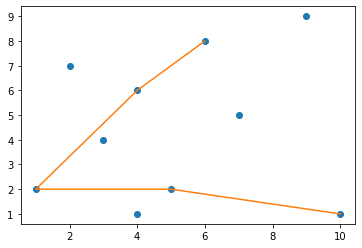

In [352]:
ImprimirTrayectoria(X,Y,resultados[-1])